# <span style="font-family: cursive">Notebook Imports</span>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# <span style="font-family: cursive">General Objectives</span>

 * Assessing Trends to Pinpoint Regions Experiencing Varied Patterns in Death Rates Due to Cancer.
 * How many Counties met the objective (achieving Death Rate of 45.5).
 * Identify Region where both Incidence and Death Rates coexists.
 * Temporal Trends and Time Series Analysis.
 * Group Regions based on similarities in Death and Incidence Rate.
 * Identify Regions where high incidence Rates align with high Death Rates
 * Identify Counties with lower or higher average Annual Count.
 * Predictive modeling

# <span style="font-family: cursive">Loading Datasets</span>

In [2]:
death_data = pd.read_csv('death.csv')
incd_data = pd.read_csv('incd.csv')

In [3]:
death_data.head(3)

,index,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,0,United States,0,No,46,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2
1,1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4


In [4]:
incd_data.head(3)

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6
2,2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3


In [5]:
death_data.info(), print('--'*35), incd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   index                                         3141 non-null   int64 
 1   County                                        3141 non-null   object
 2   FIPS                                          3141 non-null   int64 
 3   Met Objective of 45.5? (1)                    3141 non-null   object
 4   Age-Adjusted Death Rate                       3141 non-null   object
 5   Lower 95% Confidence Interval for Death Rate  3141 non-null   object
 6   Upper 95% Confidence Interval for Death Rate  3141 non-null   object
 7   Average Deaths per Year                       3141 non-null   object
 8   Recent Trend (2)                              3141 non-null   object
 9   Recent 5-Year Trend (2) in Death Rates        3141 non-null   object
 10  

(None, None, None)

# <span style="font-family: cursive">Merging DataFrames</span>

We're going to merge on FIPS which serves as a common identifier.
> The merged data will be used for exploratory analysis, or other relevant analysis\
> to study the relationship between incidence rates and death rates across counties.

In [6]:
# To start, the initial step involves eliminating any trailing spaces from the column_names.
incd_data.columns = incd_data.columns.str.strip()
death_data.columns = death_data.columns.str.strip()

de

Lets check to make sure the proper match

In [7]:
incd_data['FIPS'].nunique(), death_data['FIPS'].nunique()

(3141, 3141)

In [8]:
incd_data.FIPS.isin(death_data.FIPS).sum()

3141

 **All 3141 FIPS values in our death_data perfectly align with the incidence dataframe. We're all set to proceed with merging them!**

In [9]:
# As an added precaution
incd_data.loc[incd_data['FIPS'] == 21193, 'County'], death_data.loc[death_data['FIPS'] == 21193, 'County']

(1088    Perry County, Kentucky(7,9)
 Name: County, dtype: object,
 1    Perry County, Kentucky
 Name: County, dtype: object)

In [10]:
# merging dataframes on FIPS
df = pd.merge(death_data, incd_data, on='FIPS', how='inner')
df.head()

,index_x,County_x,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,...,index_y,County_y,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,0,United States,0,No,46,45.9,46.1,"157,376",falling,-2.4,...,0,"US (SEER+NPCR)(1,10)",62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,...,1088,"Perry County, Kentucky(7,9)",139.7,122.2,159.1,49,falling,-15,-26.3,-1.9
2,2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,...,1090,"Powell County, Kentucky(7,9)",152.9,125.7,184.6,23,stable,8.2,-7.3,26.2
3,3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,...,84,"North Slope Borough, Alaska(6,10)",153.4,95.2,229.4,6,stable,0.2,-34.3,52.7
4,4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,...,1086,"Owsley County, Kentucky(7,9)",148.1,107.8,199.8,9,stable,10.6,-13.1,40.9


In [11]:
df.drop(['index_y', 'County_y'], axis=1,  inplace=True)

# <span style="font-family: cursive">Clean and Prepare Data</span>
* Data Type Standardization
* Handling Missing Values
* Addressing Inconsistencies
* Renaming Columns

In [12]:
# Renaming Columns
df = df.rename(columns={
    'index_x' : 'index', 'County_x' : 'County',
    'Met Objective of 45.5? (1)' :'Objective',
    'Age-Adjusted Death Rate' : 'Adjusted_Age',
    'Lower 95% Confidence Interval for Death Rate' : 'Lower95%_DeathRate',
    'Upper 95% Confidence Interval for Death Rate' : 'Upper95%_DeathRate',
    'Average Deaths per Year' : 'Death_Rate',
    'Recent Trend (2)' : 'RecentTrend_x',
    'Recent 5-Year Trend (2) in Death Rates' : 'Recent5YearTrend_x',
    'Lower 95% Confidence Interval for Trend' : 'Lower95%CI_Trend',
    'Upper 95% Confidence Interval for Trend' : 'Upper95%CI_Trend',
    'Age-Adjusted Incidence Rate(Ê) - cases per 100,000' : 'Adjusted_Age_Incd',
    'Lower 95% Confidence Interval'  : 'Lower95%CI_Incd',
    'Upper 95% Confidence Interval'  : 'Upper95%CI_Incd',
    'Average Annual Count' : 'Average_Annual_Count',
    'Recent Trend' : 'RecentTrend_y',
    'Recent 5-Year Trend (ˆ) in Incidence Rates' : 'Recent5YearTrend_y',
    'Lower 95% Confidence Interval.1' : 'Lower95%CI_Incd1',
    'Upper 95% Confidence Interval.1' : 'Upper95%CI_Incd1'
})

df.set_index('index', inplace=True)

In [13]:
df.head(2)

,County,FIPS,Objective,Adjusted_Age,Lower95%_DeathRate,Upper95%_DeathRate,Death_Rate,RecentTrend_x,Recent5YearTrend_x,Lower95%CI_Trend,Upper95%CI_Trend,Adjusted_Age_Incd,Lower95%CI_Incd,Upper95%CI_Incd,Average_Annual_Count,RecentTrend_y,Recent5YearTrend_y,Lower95%CI_Incd1,Upper95%CI_Incd1
index,,,,,,,,,,,,,,,,,,,
0,United States,0,No,46,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2,62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6,139.7,122.2,159.1,49,falling,-15,-26.3,-1.9


## <span style="font-family :cursive">Features Description</span>

>* **County** --> Name of geographical region.
>* **FIPS**       --> Federal Information Processing Standards, standralized set of codes uniquely identify counties.
>* **Objective**         --> Whether the county met the objective of a death rate of 45.5.
>* **Adjusted_Age**       --> Age-adjusted death rate for cancer in the county.
>* **Lower95%_DeathRate** --> Lower Boundary esitmate of death rate within a 95% confidence interval.
>* **Upper95%_DeathRate** --> Upper Boundary estimate of death rate within a 95% confidence interval.
>* **Death_Rate**         --> Average Number of Deaths caused by cancer.
>* **Recent_Trend_x**     --> Increase, Decrease, or Stable of the cancer death rate.
>* **Recent5YearTrend_x** --> Trend in Death rates over last five years.
>* **Lower95%CI_Trend**   --> Lower boundary estimate of the Trend in death rates within 95% CI.
>* **Upper95%CI_Trend**   --> Upper boundary estimate of the Trend in death rates within 95% CI.
>* **Ajusted_Age_Incd**   --> The rate of new cases of cancer reported per 100,000, adjusted to account for age difference between populations.
>* **Average_Annual_Count**--> New cancer cases reported annually in the county.

## <span style="font-family: cursive">Handling Inconsistencies</span>
> *Before changing the data type of the necessary feature or further analysis, it's important to handle the inconsistencies.*

In [14]:
# removing commas
feat_with_comma = []
for column in df.columns:
  if df[column].dtype == 'object':
      if df[column].str.contains(',').any():
          feat_with_comma.append(column)
          print(f'{column}')

County
Death_Rate


> *We cannot eliminate them as the death rate data must be retained; instead, we need to make modifications by replacing them.*

In [15]:
for feature in feat_with_comma:
    df[feature] = df[feature].str.replace(',', '')

In [16]:
feat_with_aesterisk = []
feat_with_double_aesterisk = []
for column in df.columns:
    if df[column].dtype == 'object':
        if df[column].str.contains('\*').any():
            feat_with_aesterisk.append(column)
        if df[column].str.contains('\*\*').any():
            feat_with_double_aesterisk.append(column)
print('Features with * :\n', feat_with_aesterisk)
print('\nFeatures with  **:\n', feat_with_double_aesterisk)

Features with * :
 ['Objective', 'Adjusted_Age', 'Lower95%_DeathRate', 'Upper95%_DeathRate', 'Death_Rate', 'RecentTrend_x', 'Recent5YearTrend_x', 'Lower95%CI_Trend', 'Upper95%CI_Trend', 'Adjusted_Age_Incd', 'Lower95%CI_Incd', 'Upper95%CI_Incd', 'RecentTrend_y', 'Recent5YearTrend_y', 'Lower95%CI_Incd1', 'Upper95%CI_Incd1']

Features with  **:
 ['RecentTrend_x', 'Recent5YearTrend_x', 'Lower95%CI_Trend', 'Upper95%CI_Trend']


>* We can see from the documentation that the asterisk (*) represents a suppression of the data in instances when fewer then 16 annual cases were reported OR (**) represent missing data due to sparsity.
>* It's essential to handle these symbols appropriately during data processing.
>* We can't use asterisks, so we need to decide whether to replace them with NaN (to indicate missing values), with a numeric value that represents the suppression condition or weather we will going to remove these observations.

In [17]:
# Death Rate
def f(column):
    types = []
    for _, j in enumerate(column):
        try:
            pd.to_numeric(j)
        except:
            types.append(j)
    print(pd.Series(types).value_counts())
for col in df.columns:
    print(col)
    f(df[col])
    print('-'*25)


County
United States                  1
Powell County Montana          1
Tillamook County Oregon        1
Aiken County South Carolina    1
Union County South Dakota      1
                              ..
Upson County Georgia           1
Towns County Georgia           1
La Salle County Illinois       1
Union County Iowa              1
Ziebach County South Dakota    1
Name: count, Length: 3141, dtype: int64
-------------------------
FIPS
Series([], Name: count, dtype: int64)
-------------------------
Objective
No     1985
Yes     828
*       328
Name: count, dtype: int64
-------------------------
Adjusted_Age
*    328
Name: count, dtype: int64
-------------------------
Lower95%_DeathRate
*    328
Name: count, dtype: int64
-------------------------
Upper95%_DeathRate
*    328
Name: count, dtype: int64
-------------------------
Death_Rate
*    328
Name: count, dtype: int64
-------------------------
RecentTrend_x
stable     1796
falling     867
**          420
rising       31
*            

We can see **328** Death Rates contain an aesterisk.

> *Columns that seem to need to be fixed **Adjusted_Age_Incd**, **Average_Annual_Count**, **Recent Trends** and **Objective**.*

In [18]:
# Removing # from Adjusted Age Incidence
df.Adjusted_Age_Incd = df.Adjusted_Age_Incd.str.replace('#', '')

> *The hash sign, we're told, means **"Data do not include cases diagnosed in other states for those states in which the data exchange agreement specifically prohibits the release of data to third parties.**"*

How should we proceed? 
Well,I recommend addressing missing values by filling them in instead of removing any rows, especially considering our target variable, the death rate. Omitting rows could result in losing valuable mortality rate data. 

In [19]:
# Randomly impute values between 1 and 3 for entries with " 3 or fewer " in the Average Annual Count.
mask = df.Average_Annual_Count == '3 or fewer'
n_replacements = mask.sum()

random_values = np.random.randint(1, 4, size=n_replacements)
df.loc[mask, 'Average_Annual_Count'] = random_values

df['Average_Annual_Count'].value_counts()

Average_Annual_Count
_         192
6          89
9          79
2          76
7          73
         ... 
324         1
158         1
225         1
154         1
214614      1
Name: count, Length: 365, dtype: int64

In [20]:
# Replacing the ** with unknown in RecentTrend_x or RecentTrend_y
df.RecentTrend_x = df.RecentTrend_x.replace(['**', '*'], 'unknown').astype('category')
df.RecentTrend_y = df.RecentTrend_y.replace(['**', '*'], 'unknown').astype('category')
# Replace * with mode in Objective column
df.Objective = df.Objective.replace('*', 'missing').astype('category')

In [21]:
df.RecentTrend_x.value_counts()

RecentTrend_x
stable     1796
falling     867
unknown     447
rising       31
Name: count, dtype: int64

In [22]:
def convert_dtypes(list):
    types = []
    for _, i in df[list]:
        try:
            pd.to_numeric(i)
        except:
            types.append(i)
    print(pd.Series(types).value_counts())

In [23]:
# Standarizing dtypes
numerical_col = [
    'Adjusted_Age', 'Lower95%_DeathRate',
    'Upper95%_DeathRate', 'Death_Rate',
    'Recent5YearTrend_x', 'Lower95%CI_Trend',
    'Upper95%CI_Trend', 'Adjusted_Age_Incd',
    'Lower95%CI_Incd', 'Upper95%CI_Incd',
    'Average_Annual_Count','Recent5YearTrend_y',
    'Lower95%CI_Incd1', 'Upper95%CI_Incd1'
]

for column in numerical_col:
    df[column] = df[column].apply(lambda x : pd.to_numeric(x, errors ='coerce'))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3141 entries, 0 to 3140
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   County                3141 non-null   object  
 1   FIPS                  3141 non-null   int64   
 2   Objective             3141 non-null   category
 3   Adjusted_Age          2813 non-null   float64 
 4   Lower95%_DeathRate    2813 non-null   float64 
 5   Upper95%_DeathRate    2813 non-null   float64 
 6   Death_Rate            2813 non-null   float64 
 7   RecentTrend_x         3141 non-null   category
 8   Recent5YearTrend_x    2694 non-null   float64 
 9   Lower95%CI_Trend      2694 non-null   float64 
 10  Upper95%CI_Trend      2694 non-null   float64 
 11  Adjusted_Age_Incd     2719 non-null   float64 
 12  Lower95%CI_Incd       2719 non-null   float64 
 13  Upper95%CI_Incd       2719 non-null   float64 
 14  Average_Annual_Count  2932 non-null   float64 
 15  RecentTre

In [25]:
df.shape

(3141, 19)

In [26]:
df.isnull().sum()

County                    0
FIPS                      0
Objective                 0
Adjusted_Age            328
Lower95%_DeathRate      328
Upper95%_DeathRate      328
Death_Rate              328
RecentTrend_x             0
Recent5YearTrend_x      447
Lower95%CI_Trend        447
Upper95%CI_Trend        447
Adjusted_Age_Incd       422
Lower95%CI_Incd         422
Upper95%CI_Incd         422
Average_Annual_Count    209
RecentTrend_y             0
Recent5YearTrend_y      469
Lower95%CI_Incd1        469
Upper95%CI_Incd1        469
dtype: int64

## <span style="font-family: cursive">Handling Missing Values</span>

> *If the dataset lacks information on the death rate, and considering the relatively low quantity of such instances, it may be appropriate to remove these observations from our data*

In [27]:
df = df.dropna(subset=['Death_Rate'])

In [28]:
df.isnull().sum()

County                    0
FIPS                      0
Objective                 0
Adjusted_Age              0
Lower95%_DeathRate        0
Upper95%_DeathRate        0
Death_Rate                0
RecentTrend_x             0
Recent5YearTrend_x      119
Lower95%CI_Trend        119
Upper95%CI_Trend        119
Adjusted_Age_Incd       168
Lower95%CI_Incd         168
Upper95%CI_Incd         168
Average_Annual_Count    163
RecentTrend_y             0
Recent5YearTrend_y      191
Lower95%CI_Incd1        191
Upper95%CI_Incd1        191
dtype: int64

<Axes: >

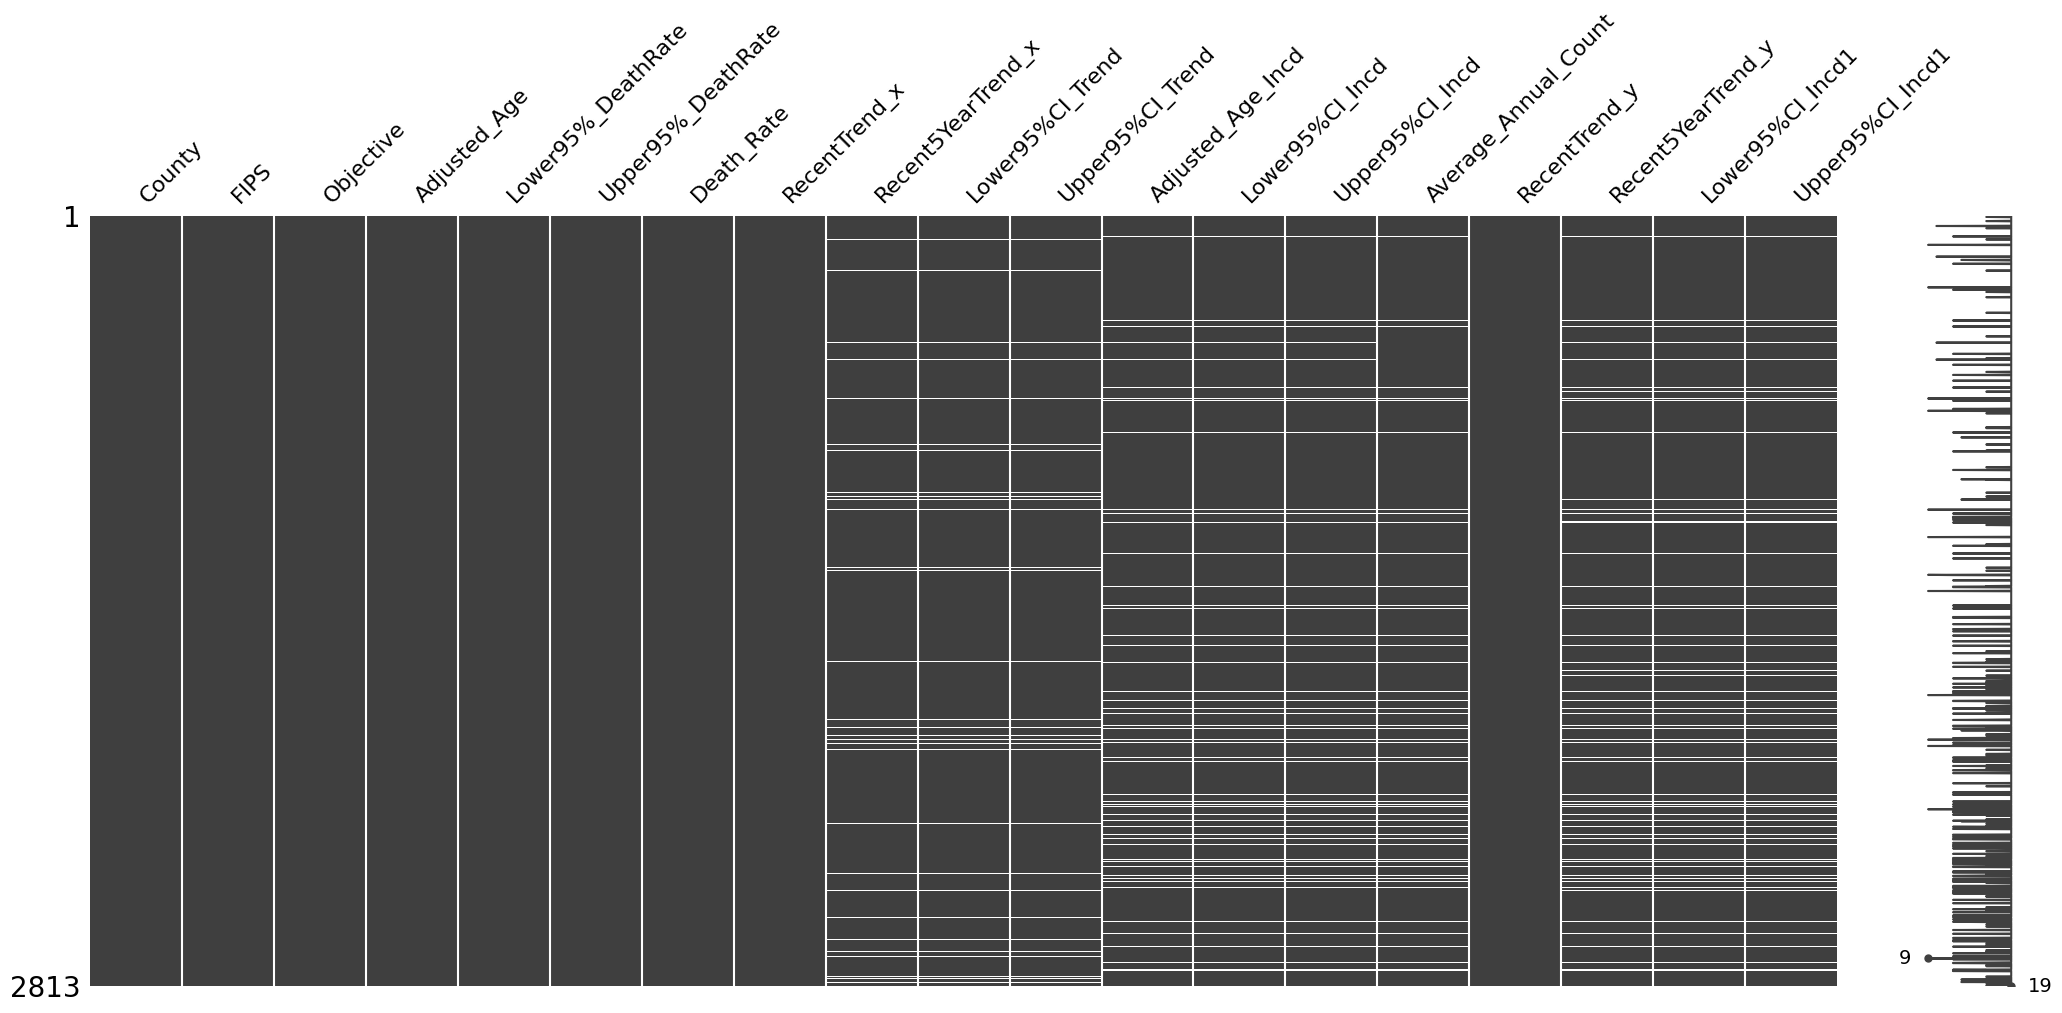

In [29]:
msno.matrix(df)

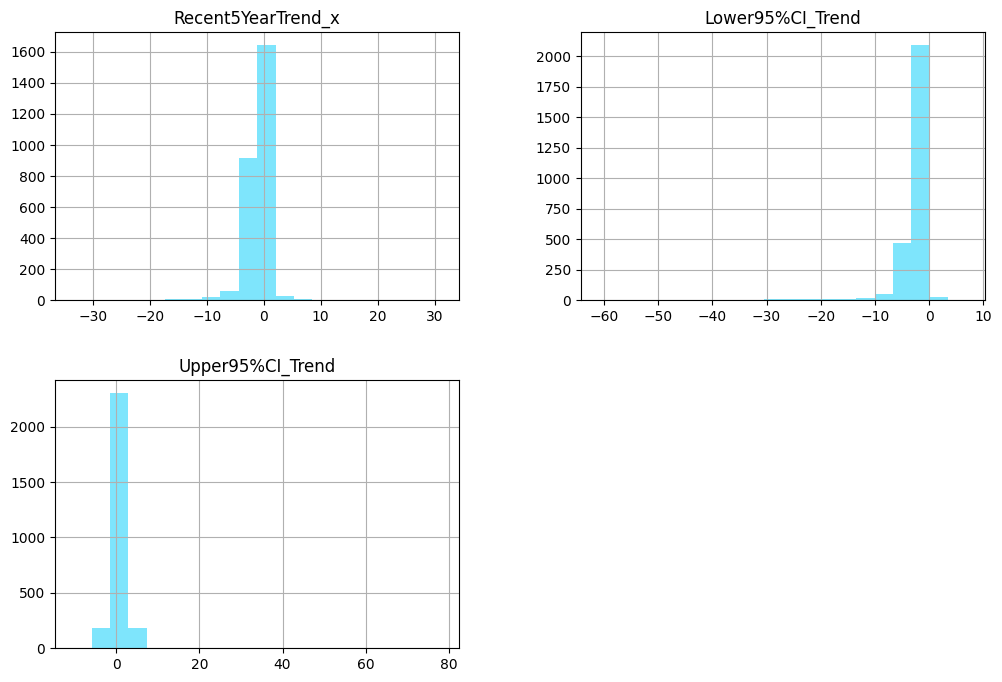

In [30]:
df[['Recent5YearTrend_x', 'Lower95%CI_Trend', 'Upper95%CI_Trend']].hist(bins=20, figsize=(12, 8), alpha=0.7, color='#48dbfb')
plt.show()

In [31]:
# Impute the missing values with mean 
col_mean = ['Recent5YearTrend_x', 'Lower95%CI_Trend', 'Upper95%CI_Trend']
df[col_mean] = df[col_mean].fillna(df[col_mean].mean())# Impute the missing values with mean 
col_mean = ['Recent5YearTrend_x', 'Lower95%CI_Trend', 'Upper95%CI_Trend']
df[col_mean] = df[col_mean].fillna(df[col_mean].mean())

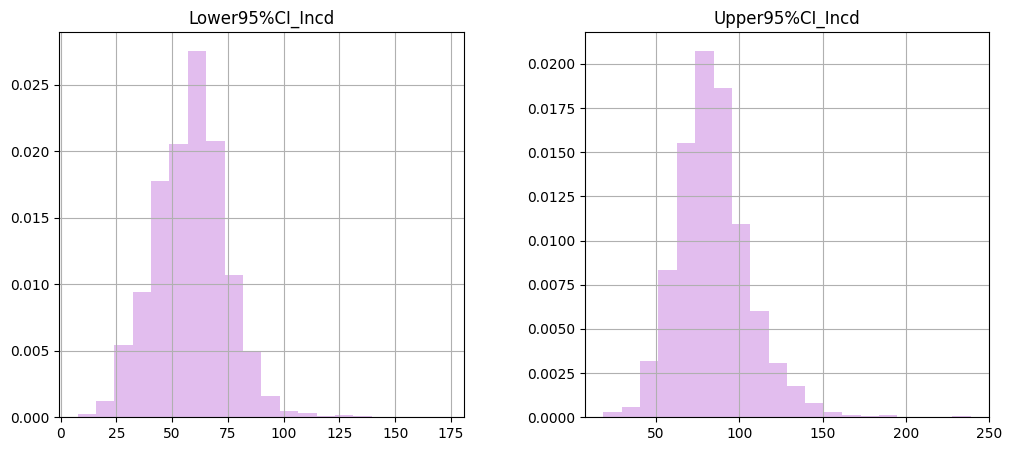

In [32]:
df[['Lower95%CI_Incd', 'Upper95%CI_Incd']].hist(bins=20, figsize=(12, 5), alpha=0.7, color='#D6A2E8', density=True)
plt.show()

In [33]:
# Impute the missing values with median 
col_median = ['Upper95%CI_Incd', 'Lower95%CI_Incd']
df[col_median] = df[col_median].fillna(df[col_median].median())

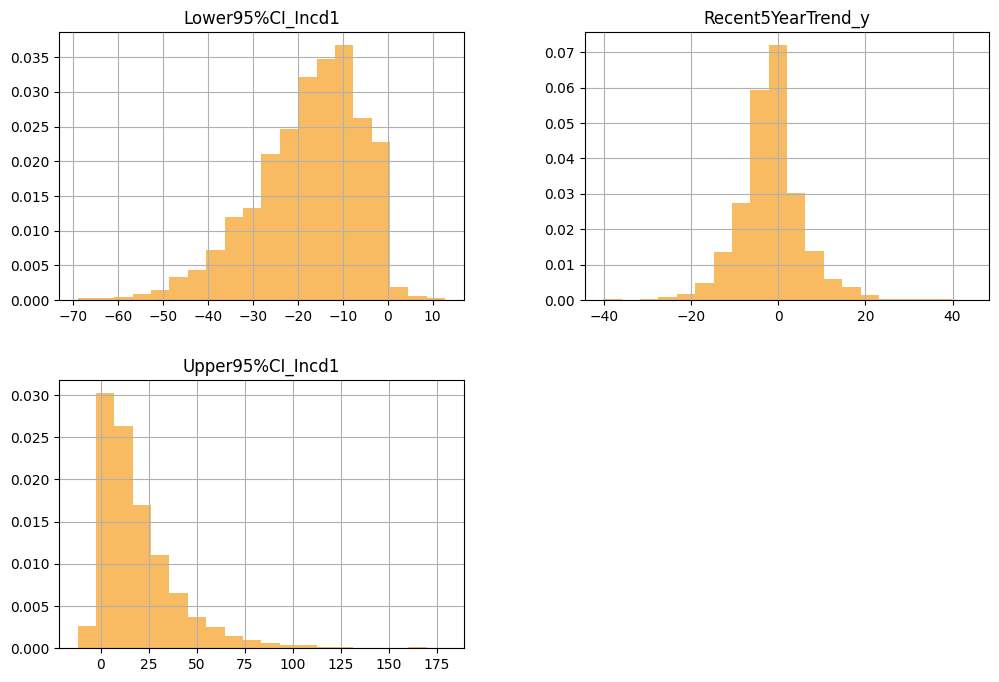

In [34]:
df[['Lower95%CI_Incd1', 'Recent5YearTrend_y', 'Upper95%CI_Incd1']].hist(bins=20, figsize=(12, 8), alpha=0.7, color='#F79F1F', density=True)
plt.show()

In [35]:
# The median makes sense given the skewed nature of the data.
imp = ['Lower95%CI_Incd1', 'Recent5YearTrend_y', 'Upper95%CI_Incd1']
df[imp] = df[imp].fillna(df[imp].median())

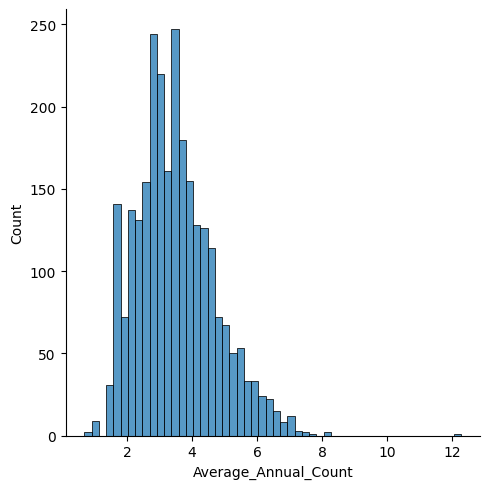

In [36]:
sns.displot(np.log(df['Average_Annual_Count']))

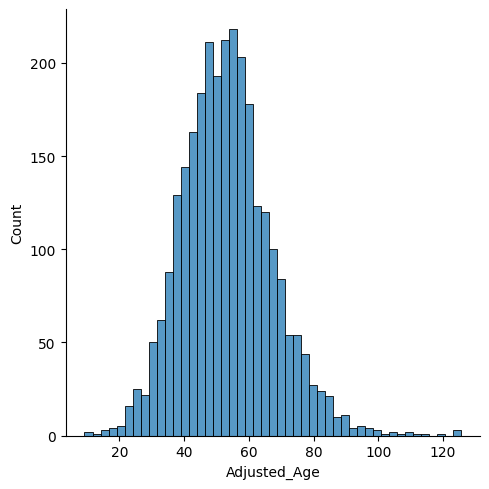

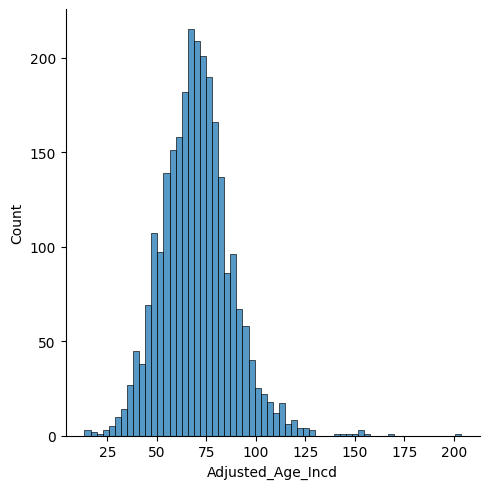

In [37]:
feat = ['Adjusted_Age', 'Adjusted_Age_Incd']
for i in feat:
 sns.displot(df[i])

In [38]:
df.Adjusted_Age_Incd.describe()

count    2645.000000
mean       70.087826
std        17.676101
min        13.500000
25%        58.500000
50%        69.500000
75%        80.000000
max       203.700000
Name: Adjusted_Age_Incd, dtype: float64

In [39]:
df.Adjusted_Age.describe()

count    2813.000000
mean       53.185140
std        14.033997
min         9.200000
25%        43.700000
50%        52.600000
75%        61.200000
max       125.600000
Name: Adjusted_Age, dtype: float64

> *We have identified outliers in the Age columns, so the first step is to remove these outliers.
Following outlier removal, we will proceed with imputing missing values using either the mean or median, depending on the specific requirements of the analysis.*




## <span style="font-family: cursive">Removing Outliers</span>

In [40]:
def removing_outliers(col):
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.9)
    
    # clip the age column to remove outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

> *The values in the specified column are **clipped**, meaning any values below the lower_bound are set to the lower_bound, and any values above the upper_bound are set to the upper_bound. This effectively removes outliers by capping extreme values.*

In [41]:
removing_outliers('Adjusted_Age')
removing_outliers('Adjusted_Age_Incd')
removing_outliers('Average_Annual_Count')

In [42]:
# now we've to impute the missing values with mean.
cols = ['Adjusted_Age', 'Adjusted_Age_Incd', 'Average_Annual_Count']
df[cols] = df[cols].fillna(df[cols].mean())

In [43]:
df.isnull().sum()

County                  0
FIPS                    0
Objective               0
Adjusted_Age            0
Lower95%_DeathRate      0
Upper95%_DeathRate      0
Death_Rate              0
RecentTrend_x           0
Recent5YearTrend_x      0
Lower95%CI_Trend        0
Upper95%CI_Trend        0
Adjusted_Age_Incd       0
Lower95%CI_Incd         0
Upper95%CI_Incd         0
Average_Annual_Count    0
RecentTrend_y           0
Recent5YearTrend_y      0
Lower95%CI_Incd1        0
Upper95%CI_Incd1        0
dtype: int64

# <span style="font-family :cursive">Data Exploration</span>

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FIPS,2813.0,30223.062211,15200.849995,0.000,18145.0,29071.000000,45031.0,56045.0
Adjusted_Age,2813.0,52.282385,11.916913,23.912,43.7,52.600000,61.2,70.7
Lower95%_DeathRate,2813.0,42.795165,12.387980,6.400,34.4,42.900000,50.8,108.9
Upper95%_DeathRate,2813.0,66.269499,18.617687,12.800,53.3,64.000000,77.0,194.7
Death_Rate,2813.0,111.708496,2968.939243,3.000,10.0,21.000000,48.0,157376.0
Recent5YearTrend_x,2813.0,-1.003526,2.321142,-33.400,-1.5,-0.900000,-0.1,31.1
Lower95%CI_Trend,2813.0,-2.755939,3.370446,-60.900,-3.0,-2.200000,-1.5,6.9
Upper95%CI_Trend,2813.0,0.837305,3.017430,-10.300,-0.3,0.700000,1.5,78.1
Adjusted_Age_Incd,2813.0,68.934197,14.355587,32.276,59.4,68.934197,79.2,91.5
Lower95%CI_Incd,2813.0,58.321792,15.591788,7.600,48.3,58.800000,67.6,172.4


In [45]:
df.shape

(2813, 19)

**How many Counties met the objective (achieving Death Rate of 45.5).**

In [46]:
df.loc[df['Objective'] == 'Yes' , 'County'].nunique()

828